<a href="https://colab.research.google.com/github/PatrickAttankurugu/PredictiveModelingWithPython/blob/main/notebooks/DataMiningProject_Group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  DATA MINING PROJECT 1
# GROUP 8
# ID: 10679907
# PATRICK AZUMA ATTANKURUGU



-----------------------------------------------------------

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from math import log2,sqrt
from six import StringIO
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm

In [179]:
from google.colab import drive

In [180]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
column_names=['Class','Alchohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline']

In [182]:
data=pd.read_csv('/content/drive/MyDrive/data/Group8_data/wine_data.csv',header=None,names=column_names)


In [183]:
#data.describe()
#This code only describes our numerical data


# a)Construct different decision trees based on different partitions of each data set into a training set and a validation set. You should clearly specify which splitting criterion you have used for tree construction, and the parameters you have selected

# SOLUTION
#Splitting data into training and validation sets ,test size=30% of the dataset

Criterion= entropy


**Selected parameters are**
1.Criterion
2.Splitter
3.Max_depth
4.min_samples_split
5.class_weight

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X=data.drop('Class',axis=1)
#we want to set X to be equal to everything but our target variable

In [186]:
y=data['Class']

# Training The Model

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [188]:
from sklearn.tree import DecisionTreeClassifier

want to create an instance of a DecisionTreeClassifier() called dtree and fit it to the training data

In [189]:
dtree=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3,min_samples_split=3,class_weight=None)

### For categorical target variables like ours, we can choose one of three splitting criteria for splitting our these criteria are Gini Impurity,Information Gain and Chi-Square

In [190]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3)

# Predictions and Evaluation of Decision Tree

To create predictions from the test set and and create a classification report and a confusion matrix

In [191]:
predictions=dtree.predict(X_test)

In [192]:
from sklearn.metrics import classification_report, confusion_matrix

In [193]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        15
           2       0.74      0.85      0.79        20
           3       0.88      0.74      0.80        19

    accuracy                           0.83        54
   macro avg       0.85      0.84      0.84        54
weighted avg       0.84      0.83      0.83        54



In [194]:
print(confusion_matrix(y_test,predictions))

[[14  1  0]
 [ 1 17  2]
 [ 0  5 14]]


# Visualizing The Tree

In [195]:
from sklearn.tree import export_graphviz

In [196]:
feature_names=list(X_train.columns)

In [197]:
dot_data=StringIO()

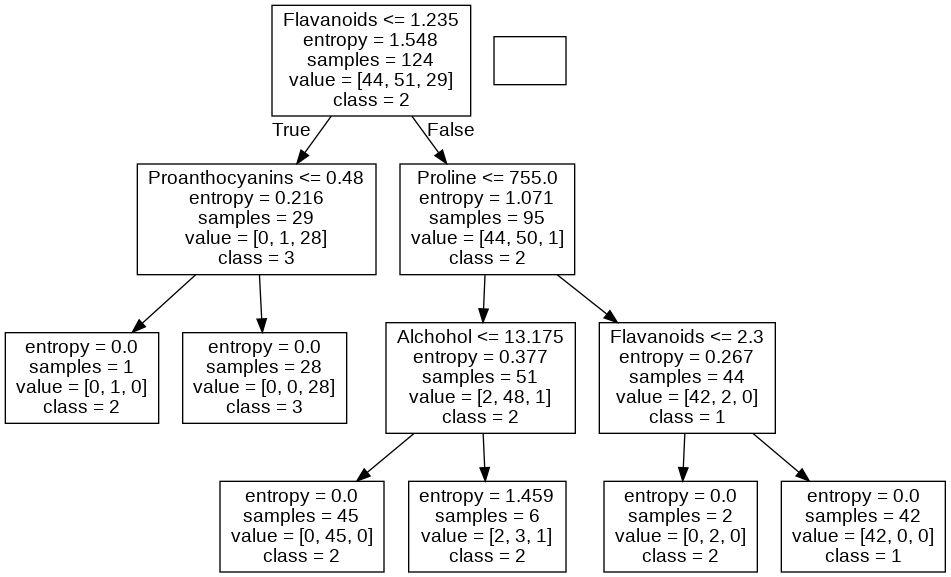

In [198]:
export_graphviz(dtree,out_file=dot_data,feature_names=feature_names,class_names=['1','2','3'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Wine_tree.png')
Image(graph.create_png())



# ANOTHER DECISION TREE FOR WHICH TEST SIZE IS 33% OF THE DATASET

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


# VISUALIZING THIS TREE

In [200]:
another_dtree=tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3,min_samples_split=3,class_weight=None)

In [201]:
another_dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3)

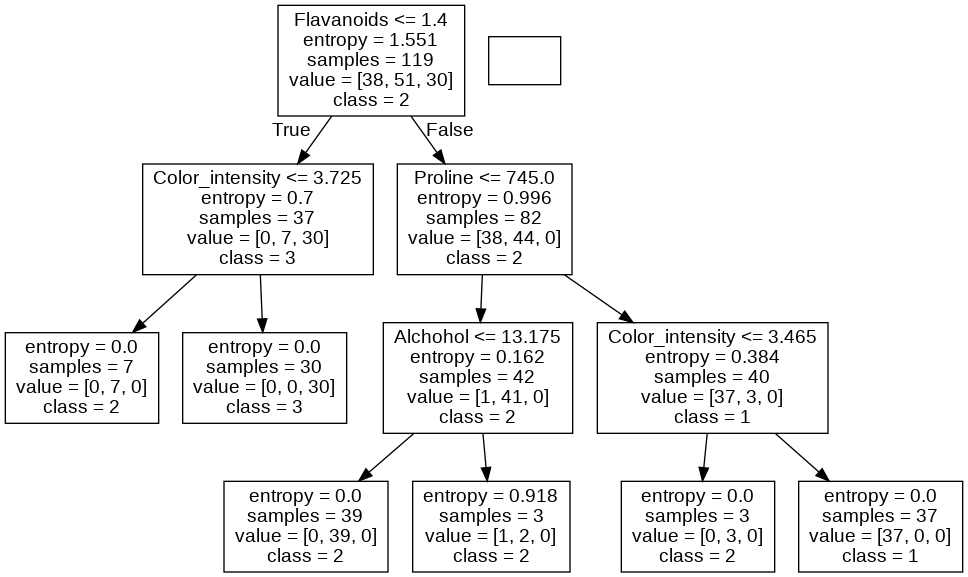

In [202]:
dot_data=StringIO()
export_graphviz(another_dtree,out_file=dot_data,feature_names=feature_names,class_names=['1','2','3'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Wine_tree.png')
Image(graph.create_png())


# Printing the importance of the features

In [203]:
feature_names=list(X_train.columns)
num_features=len(feature_names)
importances=dtree.feature_importances_
df_importance=pd.DataFrame({'names':feature_names,'importances':importances})
#df_importance=df_importance.sort_values('importance',ascending=False).reset_index()
df_importance

,names,importances
0,Alchohol,0.057107
1,Malic_acid,0.000000
2,Ash,0.000000
3,Alcalinity_of_ash,0.000000
4,Magnesium,0.000000
5,Total_phenols,0.000000
6,Flavanoids,0.522253
7,Nonflavanoid_phenols,0.000000
8,Proanthocyanins,0.034260
9,Color_intensity,0.000000


The above output shows that only Alchohol,Flavanoids, Proanthocyanins and Proline are important as far as our model is concerned, the rest of the features cannot do our model any good when used.

# VETEBRAL COLUMN DATASET. DATASET WITH THREE CLASSES: DH,SL AND NO

**importing the data from google drive**

In [204]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
titles=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius','grade of spondylolisthesis','Classification']

In [206]:
df=pd.read_csv('/content/drive/MyDrive/data/Group8_data/vertebral_column.csv',names=titles)

In [207]:
df['Classification'].unique()

array(['DH', 'SL', 'NO'], dtype=object)

In [208]:
X=df.drop('Classification',axis=1)
#we want to set X to be equal to everything but our target variable

In [209]:
y=df['Classification']

#TRAINING VERTEBRAL COLUMN MODEL FOR WHICH TEST SIZE=0.3

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#we split our data into training and validation sets


In [211]:
dectree=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3,min_samples_split=2,class_weight=None)

In [212]:
dectree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# first predictions
# Later, we will compare this with the model for which validation size is 0.33

# For now, this is the performance for vertebral column data for which validation size is 0.3

In [213]:
first_predictions=dectree.predict(X_test)

In [214]:
print("CONFUSION MATRIX")
print('\n')
print('The main diagonal represent the classification for which we got right. All other values are false positives and false negatives')
print('\n')
print(confusion_matrix(y_test,first_predictions))
print('----------------------------------------------')
print('CLASSIFICATION REPORT')
print('\n')
print(classification_report(y_test,first_predictions))

#Our target variable- Classification has three possible outcomes. That is why are confusion matrix is a 3x3 matrix instead of the usual 2x2 matrix.


CONFUSION MATRIX


The main diagonal represent the classification for which we got right. A false positives and false negatives


[[16  5  0]
 [ 9 19  1]
 [ 1  2 40]]
----------------------------------------------
CLASSIFICATION REPORT


              precision    recall  f1-score   support

          DH       0.62      0.76      0.68        21
          NO       0.73      0.66      0.69        29
          SL       0.98      0.93      0.95        43

    accuracy                           0.81        93
   macro avg       0.77      0.78      0.77        93
weighted avg       0.82      0.81      0.81        93



# VISUALIZING THE TREE

In [215]:
feature_names=list(X_train.columns)

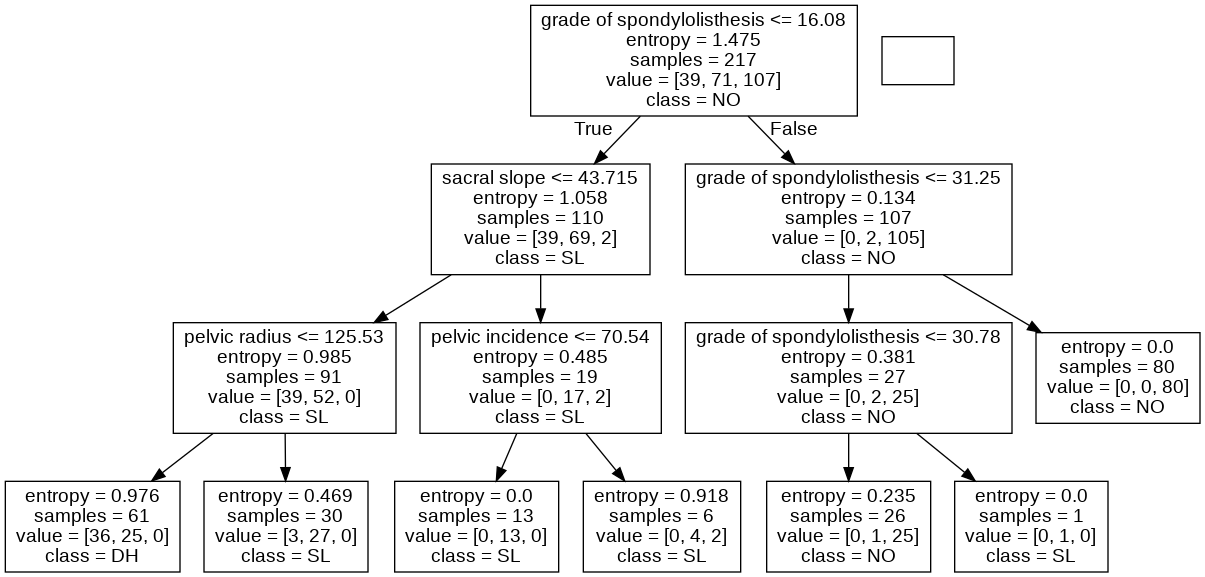

In [216]:
dot_data=StringIO()
export_graphviz(dectree,out_file=dot_data,feature_names=feature_names,class_names=['DH','SL','NO'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Vertebral_Column.png')
Image(graph.create_png())

# TRAINING THE VERTEBRAL COLUMN MODEL FOR TEST SIZE=0.33


In [217]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
#we split our data into training and validation sets


In [218]:
another_dectree=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3,min_samples_split=2,class_weight=None)

In [219]:
another_dectree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

# VISUALIZING TREE FOR WHICH VALIDATION SET IS 0.33

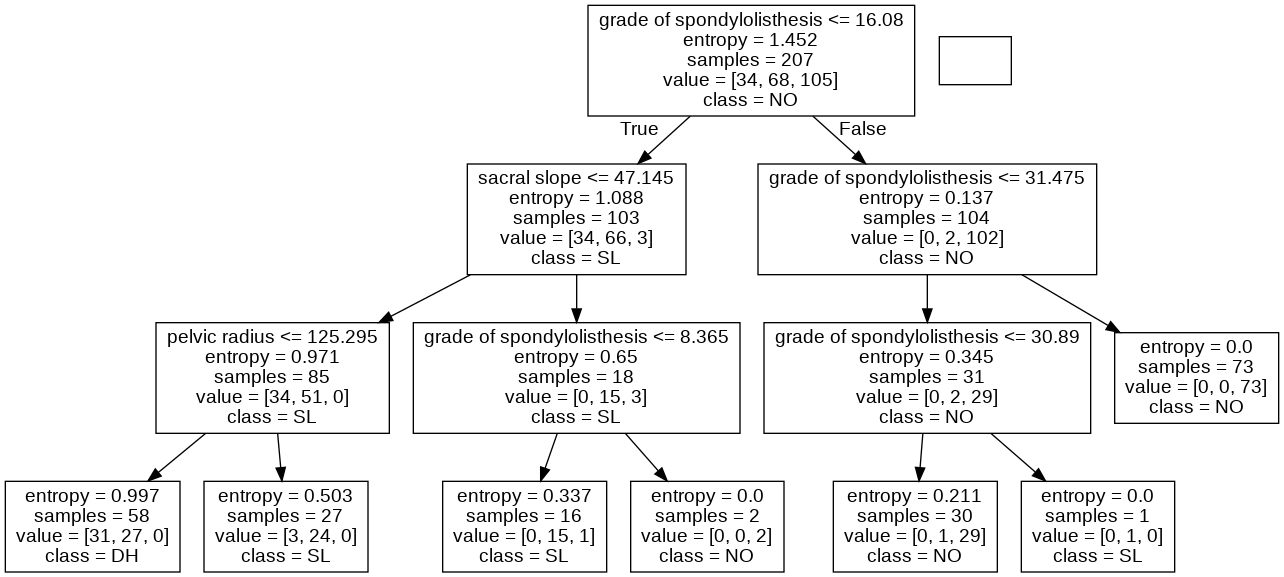

In [220]:
dot_data=StringIO()
export_graphviz(another_dectree,out_file=dot_data,feature_names=feature_names,class_names=['DH','SL','NO'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Vertebral_Column.png')
Image(graph.create_png())

# B) COMPARE THE STRUCTURES AND CLASSIFICATION PERFORMANCES OF THESE DIFFERENT TREES






# Solution

Performance for vertebral column data for which test size is 0.33



In [221]:
second_predictions=dectree.predict(X_test)

In [222]:
print("CONFUSION MATRIX")
print('\n')
print(confusion_matrix(y_test,second_predictions))
print('----------------------------------------------')
print('CLASSIFICATION REPORT')
print('\n')
print(classification_report(y_test,second_predictions))

CONFUSION MATRIX


[[23  3  0]
 [ 8 23  1]
 [ 1  1 43]]
----------------------------------------------
CLASSIFICATION REPORT


              precision    recall  f1-score   support

          DH       0.72      0.88      0.79        26
          NO       0.85      0.72      0.78        32
          SL       0.98      0.96      0.97        45

    accuracy                           0.86       103
   macro avg       0.85      0.85      0.85       103
weighted avg       0.87      0.86      0.86       103



# E) FOR A SELECTED TRAINING/VALIDATION SET PARTITION IN (A), SELECT DIFFERENT SUBSETS OF ATTRIBUTES AND CONSTRUCT CORRESPONDING DECISION TREES. COMPARE THE RESULTING STRUCTURES AND CLASSIFICATION PERFORMANCE WITH THOSE OF THE ORIGINAL TREE.    

# We want to do away with the features that are not important and select a subset of features that are impotant for the construction of our decision tree

In [223]:
feature_names=list(X_train.columns)
num_features=len(feature_names)
importances=another_dectree.feature_importances_
df_importance=pd.DataFrame({'names':feature_names,'importances':importances})
#df_importance=df_importance.sort_values('importance',ascending=False).reset_index()
df_importance

#From the output below it is evident that pelvic tilt  and lumbar lordosis angle  are unimportant features as far as our decision tree is concerned

,names,importances
0,pelvic incidence,0.000000
1,pelvic tilt,0.000000
2,lumbar lordosis angle,0.000000
3,sacral slope,0.081921
4,pelvic radius,0.051222
5,grade of spondylolisthesis,0.866858


Some questions to be raised later concerning the umimportance of the  pelvic tilt and lumbar lordosis angle features above

# We want to now contruct another decision tree with validation set  of 0.33, and using only the four important features instead of the orginal six features.

In [224]:
X=df.drop(['Classification','pelvic tilt','lumbar lordosis angle'],axis=1)
#we want to set X to be equal to everything except our target variable-Classification and the two unimportant features-pelvic tilt and lumbar lordosis angle

In [225]:
y=df['Classification']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
#we split our data into training and validation sets

In [227]:
optimized_dectree=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3,min_samples_split=2,class_weight=None)

In [228]:
optimized_dectree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

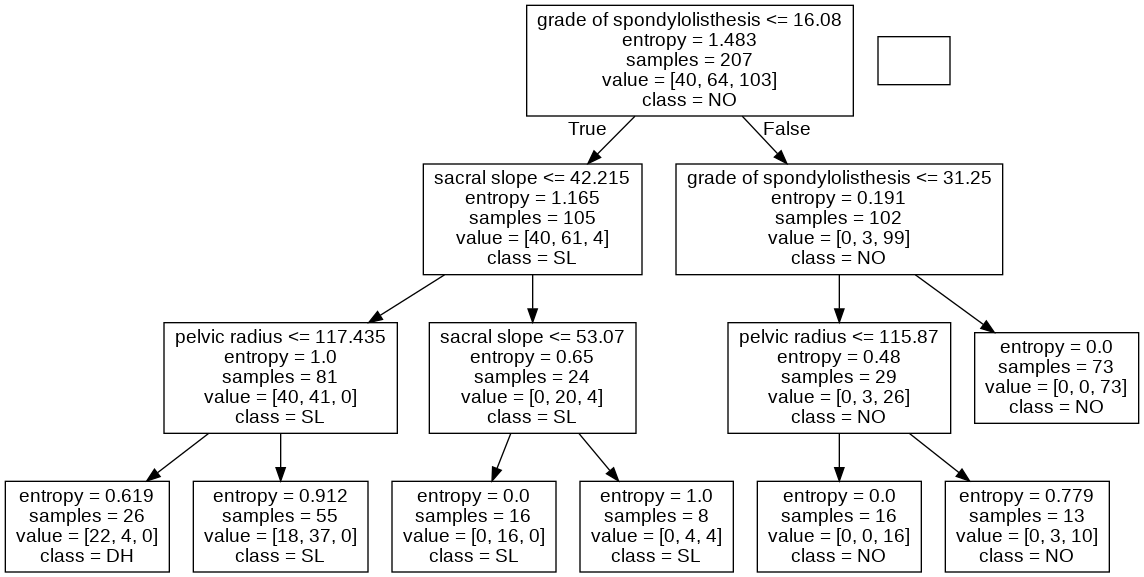

In [229]:
feature_names=list(X_train.columns)
dot_data=StringIO()
export_graphviz(optimized_dectree,out_file=dot_data,feature_names=feature_names,class_names=['DH','SL','NO'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Vertebral_Column.png')
Image(graph.create_png())

# Classification performance

In [230]:
optimized_dectree_predictions=optimized_dectree.predict(X_test)
print("CONFUSION MATRIX")
print('\n')
print(confusion_matrix(y_test,optimized_dectree_predictions))
print('----------------------------------------------')
print('CLASSIFICATION REPORT')
print('\n')
print(classification_report(y_test,optimized_dectree_predictions))

CONFUSION MATRIX


[[ 9 11  0]
 [ 5 31  0]
 [ 1  0 46]]
----------------------------------------------
CLASSIFICATION REPORT


              precision    recall  f1-score   support

          DH       0.60      0.45      0.51        20
          NO       0.74      0.86      0.79        36
          SL       1.00      0.98      0.99        47

    accuracy                           0.83       103
   macro avg       0.78      0.76      0.77       103
weighted avg       0.83      0.83      0.83       103



We did not expect the peformance of this decision tree to be lower than that of the original model with which  we used all the features. Our reasoning is that, though  we dropped two features- pelvic tilt and lumbar lordosis angle, and used only four subfeatures to train this model and contruct the decision tree, we expected their performances to either be the same or to have the performace of this model to be better than the original one.The later model performs better when it is predicting for 'NO' or 'SL' but does it poorly or 'DH'. The features we dropped are said to be unimportant features but they still had slight effect on the performace of the model. Is our data unbalanced? Are the features we dropped really as umimportant as the algorithm says? what might be the reason for the variation in performance? We need to dig deeper to know why the variation in performance...

# D) FOR A SELECTED CONFUSED CLASS PAIR IN (C), IDENTIFY THE CORRESPONDING LEAF NODE(S) AND ANALYZE THE SEQUENCE OF DECISIONS THAT LEAD TO THE MISCLASSIFICATION. 

So we began with grade of spondylolisthesis with 207 samples and enthropy of 1.4833 and that was classified as a NO-Normal. The root node splits to have sacral loop and another grade of spondylolisthesis at a depth of two. If the enthropy is 1.165,  we classify it as SL and then move on to check for pelvic radius otherwise we end there, we set the max_depth to be 3,that is why the decision will end there and final classification made. 
If the enthropy is 1.0, we classify it as SL and then move on to calculate for enthropy again, otherwise it remains as SL.
We have enthropy to be 0.619 and classified as DH, a similar approach is used at the right hand side if the decision made at the root node is false.
This led to the 16 misclassifications we had in our model 

# C) OBSERVE THE CLASSIFICATION PERFORMANCE ASSOCIATED WITH THE DIFFERENT CLASSES, AND DETERMINE WHICH PAIR(S) OF CLASSES ARE LIKELY TO BE CONFUSED WITH EACH OTHER

# This Is The Essence Of A Confusion Matrix. So Let's Do This...

From the confusion matrix above, if we look at the second column of the first row, we see the value 11, this shows that 11 values are predicted to be DH when they are actually NO. If we also look at the second row of the first column, that is within the lower triangular matrix, we see the value 5, and this also mean that 5 values were predicted to be NO when they are actually DH. So NO and DH are the two pair of classes that are likely to be confused with each other